<a href="https://colab.research.google.com/github/raheelam98/LangGraph/blob/main/agentic_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the required packages
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai

In [2]:
# API Keys
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "agentic_test1"

gemini_api_key = userdata.get('GEMINI_API_KEY')

In [3]:
# ChatGoogleGenerativeAI
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

In [4]:
# check llm is working
result = llm.invoke("hi")
result

AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f084d54d-c66c-4acc-9876-f4c0473f6766-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [ ]:
%%capture --no-stderr
%pip install -U tavily-python langchain_community

In [ ]:
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

part 1

In [9]:
# Import IPython display classes for visual representation
from IPython.display import Image, display

# Import necessary modules from langgraph.graph for building the state graph
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

# Import CompiledStateGraph for compiling the state graph
from langgraph.graph.state import CompiledStateGraph


# Note that call llm
def tool_calling_llm(state: MessagesState)-> MessagesState:
  # Invoke the LLM tools with the current messages from the state and return the updated state
  return {"messages": llm_with_tools.invoke(state["messages"])}

# Build the state graph
builder: StateGraph = StateGraph(MessagesState)

# Check if the node already exists before adding it
if "tool_calling_llm" not in builder.nodes:
  builder.add_node("tool_calling_llm", tool_calling_llm)
else:
  print("Node tool_calling_llm already present")


# Define edges for the graph
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

# Compile the graph
graph: CompiledStateGraph = builder.compile()

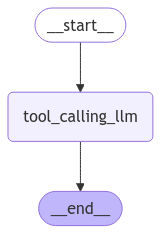

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [15]:
from langchain_core.messages import HumanMessage

# Prepare the initial message from the human
messages = [HumanMessage(content="Hi Raheela .")]

# Invoke the graph with the prepared messages
messages = graph.invoke({"messages": messages})

# Messages are stored in a list, so we use a for loop to print each message.

# Iterate through the returned messages and print each one
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

Hi Raheela .
================================== Ai Message ==================================

Hello Raheela! How can I help you today?


# Router
**Module 1 : 3_router.ipynb**

* Return a tool call
* Return a natural language response

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

# making criteria (point 1)
def multiply(num1: int , num2: int) -> int:
  """Multiply num1 and num2
  Args:
      num1: first int
      num2: second int
  """
  return num1 * num2

# providing information to lainchain (point 2)

# Bind the tools to LLM
llm_with_tools = llm.bind_tools(multiply)

result = multiply(2,3)
print("Answer of mutiplication ",result)

Answer of mutiplication  6


In [18]:
# Import IPython display classes for visual representation
from IPython.display import Image, display

# Import necessary modules from langgraph.graph for building the state graph
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

# Import CompiledStateGraph for compiling the state graph
from langgraph.graph.state import CompiledStateGraph

# Import ToolNode and tools_condition from langgraph.prebuilt (new)
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


# Note that call llm
def tool_calling_llm(state: MessagesState)-> MessagesState:
  # Invoke the LLM tools with the current messages from the state and return the updated state
  return {"messages": llm_with_tools.invoke(state["messages"])}

# Build the state graph
builder: StateGraph = StateGraph(MessagesState)

# # Check if the node already exists before adding it
# if "tool_calling_llm" not in builder.nodes:
#   builder.add_node("tool_calling_llm", tool_calling_llm)
# else:
#   print("Node tool_calling_llm already present")

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))     # NEW - Route :- Add ToolNode for the multiply function
# (point 2) ToolNode() takes route/action to reach the ice cream shop


# Define edges for the graph
builder.add_edge(START, "tool_calling_llm")

# NEW Route :- (point 3) add_conditional_edges(): decides whether to go to the ice cream shop or no
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

builder.add_edge("tools", END)

# Compile the graph
graph: CompiledStateGraph = builder.compile()

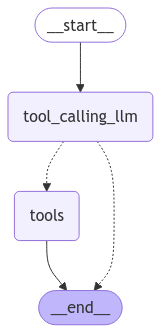

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [20]:
from langchain_core.messages import HumanMessage

# Prepare the initial message from the human
messages = [HumanMessage(content="Hi Raheela .")]

# Invoke the graph with the prepared messages
messages = graph.invoke({"messages": messages})

# Messages are stored in a list, so we use a for loop to print each message.

# Iterate through the returned messages and print each one
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

Hi Raheela .
================================== Ai Message ==================================

Hello Raheela! How can I help you today?


In [21]:
# Import the HumanMessage class from langchain_core.messages
from langchain_core.messages import HumanMessage

# Prepare the initial message from the human with the content "Multiply 2 and 3."
messages = [HumanMessage(content="Multiply 3 and 6.")]

# Invoke the graph with the prepared messages
messages = graph.invoke({"messages": messages})

# Iterate through the returned messages and print each one
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 3 and 6.
================================== Ai Message ==================================
Tool Calls:
  multiply (60eb94ce-72fb-4a3b-9704-b7b1caea3876)
 Call ID: 60eb94ce-72fb-4a3b-9704-b7b1caea3876
  Args:
    a: 3.0
    b: 6.0
================================= Tool Message =================================
Name: multiply

18


In [22]:
from langchain_google_genai import ChatGoogleGenerativeAI

# making criteria (point 1)
def multiply(num1: int , num2: int) -> int:
  """Multiply num1 and num2
  Args:
      num1: first int
      num2: second int
  """
  return num1 * num2

# providing information to lainchain (point 2)

# Bind the tools to LLM, provide information (lain chain)
llm_with_tools = llm.bind_tools(multiply)
# Bind the tools to the LLM (point 1: provide information (lain chain) about the shops available on the way from one tole to another)

result = multiply(2,3)
print("Answer of mutiplication ",result)

Answer of mutiplication  6


In [31]:
# Import IPython display classes for visual representation
from IPython.display import Image, display

# Import necessary modules from langgraph.graph for building the state graph
from langgraph.graph import StateGraph, START, END, MessagesState
# Import CompiledStateGraph for compiling the state graph
from langgraph.graph.state import CompiledStateGraph
# Import ToolNode and tools_condition from langgraph.prebuilt (new)
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Note that call llm
def tool_calling_llm(state: MessagesState)-> MessagesState:
  # Invoke the LLM tools with the current messages from the state and return the updated state
  return {"messages": llm_with_tools.invoke(state["messages"])}

# Build the state graph
builder: StateGraph = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)
# Route :- Add ToolNode for the multiply function
builder.add_node("tools", ToolNode([multiply]))
# (point 2) ToolNode() takes route/action to reach the ice cream shop

# Define edges for the graph
builder.add_edge(START, "tool_calling_llm")

# Route :- (point 3) add_conditional_edges(): decides whether to go to the ice cream shop or no
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
# NEW - Agent :- Define the edge from tools back to tool_calling_llm
builder.add_edge("tools", "tool_calling_llm")
# Compile the graph
graph: CompiledStateGraph = builder.compile()

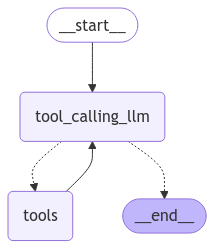

In [32]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [37]:
from langchain_core.messages import HumanMessage

# Prepare the initial message from the human
messages = [HumanMessage(content="What is AI Agent.")]

# Invoke the graph with the prepared messages
messages = graph.invoke({"messages": messages})

# Messages are stored in a list, so we use a for loop to print each message.

# Iterate through the returned messages and print each one
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is AI Agent.
================================== Ai Message ==================================

An AI agent is a system that perceives its environment and takes actions to maximize its chances of successfully achieving its goals.  It's a software program or a physical robot that can act autonomously.  The key characteristics are perception (gathering information), action (influencing the environment), and goal-oriented behavior (striving for a specific outcome).


In [39]:
# Prepare the initial message from the human with the content "Add 3 and 4"
messages = [HumanMessage(content="Multiply 3 and 4")]

# Invoke the graph with the prepared messages
messages = graph.invoke({"messages": messages})

In [40]:
# Iterate through the returned messages
for m in messages['messages']:
    # Print each message in a formatted manner
    m.pretty_print()

================================ Human Message =================================

Multiply 3 and 4
================================== Ai Message ==================================
Tool Calls:
  multiply (55555226-c957-4125-8e12-d6275f08c94b)
 Call ID: 55555226-c957-4125-8e12-d6275f08c94b
  Args:
    num2: 4.0
    num1: 3.0
================================= Tool Message =================================
Name: multiply

12
================================== Ai Message ==================================

The result is 12.
